Modeling the Home Credit Default Risk dataset using machine learning.The data preprocessing, feature engineering, model selection, training, and evaluation. Here's a high-level overview of the strategy used:

**1. Data Preprocessing:**
   - Load the data files you mentioned (`application_train.csv`) into pandas DataFrames.
   - Handle missing values: Identify and handle missing data in each dataset. I used techniques more advanced methods depending on the context.
   - Encode categorical variables: Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.Adding a addiional categorical variable of null values.
   - Assigning value according to target mean per category.

**2. Feature Engineering:**
   - Created new features where necessary. For example transformations of existing features,normalised and probabilitstic transformation.
   - Selected relevant features: Using feature selection techniques like Recursive Feature Elimination to choose the most important features.

**3. Model Selection:**
   - Choose a batch of machine learning algorithms to train on the dataset. Common algorithms for binary classification problems like credit default prediction include Logistic Regression, Random Forest, Gradient Boosting and Neural Networks are tested and measured.

**4. Model Training:**
   - Spliting the training data into a training set and a validation set to evaluate model performance during training.
   - Train the selected model(s) on the training data.
   - Tuned with model stacking to test for performance.

**5. Model Evaluation:**
   - Evaluated the model's performance on the validation set using appropriate metrics such as  recall,ROC AUC.
   - Visualization of results such as ROC curves, precision-recall curves, and confusion matrices to better understand the model's performance.
   - Random Forest Model and Gradient Boosting Method are giving high performance.

**6. Interpretability:**
   - For credit risk models, interpretability is crucial. I used techniques like SHAP (SHapley Additive exPlanations)  to explain model predictions to the readers.



In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split


__Feature Engineering__

In [35]:
application_train = pd.read_csv('application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Checking for missing values in the dataset
missing_values = application_train.isnull().sum()
print(missing_values)
print(len(application_train))
rows, columns = application_train.shape
print("Number of rows in application_train:", rows)
print("Number of columns in application_train:", columns)

application_train.info()
application_train.describe

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
307511
Number of rows in application_train: 307511
Number of columns in application_train: 122
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [37]:

# Getting the data types of each column
data_types = application_train.dtypes
print(data_types)

# Separating columns into categorical and numerical
categorical_vars = data_types[data_types == 'object'].index
numerical_vars = data_types[data_types != 'object'].index

print("Categorical Variables:")
print(categorical_vars)

print("\nNumerical Variables:")
print(numerical_vars)


SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object
Categorical Variables:
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

Numerical Variables:
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [38]:
# Check the number of NaN values in each categorical column
nan_counts = application_train[categorical_vars].isnull().sum()

print("Number of NaN values in each categorical variable:")
print(nan_counts)

Number of NaN values in each categorical variable:
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64


In [39]:

# Loop through each categorical column and replace NaN values with a new category 'Missing'
for col in categorical_vars:
    application_train[col].fillna('Missing', inplace=True)

# Now, we have replaced NaN values in categorical variables with the 'Missing' category
# Check the number of NaN values in each categorical column
nan_counts = application_train[categorical_vars].isnull().sum()

# Print the number of NaN values for each categorical column
print("Number of NaN values in each categorical variable:")
print(nan_counts)

Number of NaN values in each categorical variable:
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64


**2) Dealing with rare values**

In [40]:
# Define a threshold for considering values as "rare".You can define this threshold.
rare_threshold = 10

# Create an empty dictionary to store rare values for each column
rare_values = {}

# Loop through each categorical column and find rare values
for col in categorical_vars:
    value_counts = application_train[col].value_counts()
    rare_values[col] = value_counts[value_counts < rare_threshold].index.tolist()

# Print the rare values for each categorical column
for col, values in rare_values.items():
    print(f"Rare values in '{col}': {', '.join(values)}")

Rare values in 'NAME_CONTRACT_TYPE': 
Rare values in 'CODE_GENDER': XNA
Rare values in 'FLAG_OWN_CAR': 
Rare values in 'FLAG_OWN_REALTY': 
Rare values in 'NAME_TYPE_SUITE': 
Rare values in 'NAME_INCOME_TYPE': Maternity leave
Rare values in 'NAME_EDUCATION_TYPE': 
Rare values in 'NAME_FAMILY_STATUS': Unknown
Rare values in 'NAME_HOUSING_TYPE': 
Rare values in 'OCCUPATION_TYPE': 
Rare values in 'WEEKDAY_APPR_PROCESS_START': 
Rare values in 'ORGANIZATION_TYPE': 
Rare values in 'FONDKAPREMONT_MODE': 
Rare values in 'HOUSETYPE_MODE': 
Rare values in 'WALLSMATERIAL_MODE': 
Rare values in 'EMERGENCYSTATE_MODE': 


In [41]:
# Replace rare values with 'Rare' category
for col, values in rare_values.items():
    application_train[col] = application_train[col].apply(lambda x: 'Rare' if x in values else x)

# Print the changes in the dataset for each categorical column
for col in categorical_vars:
    before_count = len(application_train[col].unique())
    after_count = len(application_train[col].unique())
    print(f"Changes in '{col}': {before_count} unique values before, {after_count} unique values after.")

Changes in 'NAME_CONTRACT_TYPE': 2 unique values before, 2 unique values after.
Changes in 'CODE_GENDER': 3 unique values before, 3 unique values after.
Changes in 'FLAG_OWN_CAR': 2 unique values before, 2 unique values after.
Changes in 'FLAG_OWN_REALTY': 2 unique values before, 2 unique values after.
Changes in 'NAME_TYPE_SUITE': 8 unique values before, 8 unique values after.
Changes in 'NAME_INCOME_TYPE': 8 unique values before, 8 unique values after.
Changes in 'NAME_EDUCATION_TYPE': 5 unique values before, 5 unique values after.
Changes in 'NAME_FAMILY_STATUS': 6 unique values before, 6 unique values after.
Changes in 'NAME_HOUSING_TYPE': 6 unique values before, 6 unique values after.
Changes in 'OCCUPATION_TYPE': 19 unique values before, 19 unique values after.
Changes in 'WEEKDAY_APPR_PROCESS_START': 7 unique values before, 7 unique values after.
Changes in 'ORGANIZATION_TYPE': 58 unique values before, 58 unique values after.
Changes in 'FONDKAPREMONT_MODE': 5 unique values befo

In [42]:
# Separate columns into categorical and numerical
categorical_vars = data_types[data_types == 'object'].index

# Define a dictionary to store target means for each category
target_means = {}

# Loop through each categorical column and calculate the mean target value for each category
for col in categorical_vars:
    category_means = application_train.groupby(col)['TARGET'].mean()
    target_means[col] = category_means

# Map the target means back to the categorical columns
for col in categorical_vars:
    application_train[col] = application_train[col].map(target_means[col])

# Now, the categorical variables have been converted into numerical values based on the mean target value for each category

In [43]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.083459,0.101419,0.085002,0.083249,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0.083459,0.069993,0.085002,0.079616,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0.083459,0.069993,0.085002,0.079616,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0.083459,0.069993,0.085002,0.079616,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Feature Engineering 2 - Numerical Variables**


In [44]:
# Define the lower and upper quantiles for replacing missing values
lower_quantile = 0.01  
upper_quantile = 0.99  

# Create a dictionary to store the changes
changes = {}

# Loop through each numerical column and replace missing values
for col in numerical_vars:
    original_missing_count = application_train[col].isnull().sum()
    lower_replace_value = application_train[col].quantile(lower_quantile)
    upper_replace_value = application_train[col].quantile(upper_quantile)
    application_train[col].fillna(np.nanmin([lower_replace_value, upper_replace_value]), inplace=True)
    changes[col] = {
        'Original Missing Count': original_missing_count,
        'New Missing Count': application_train[col].isnull().sum(),
        'Lower Replacement Value': lower_replace_value,
        'Upper Replacement Value': upper_replace_value
    }

# Print the changes for each numerical column
for col, details in changes.items():
    print(f"Changes in '{col}':")
    print(f"Original Missing Count: {details['Original Missing Count']}")
    print(f"New Missing Count: {details['New Missing Count']}")
    print(f"Lower Replacement Value: {details['Lower Replacement Value']}")
    print(f"Upper Replacement Value: {details['Upper Replacement Value']}")
    print("=" * 40)

Changes in 'SK_ID_CURR':
Original Missing Count: 0
New Missing Count: 0
Lower Replacement Value: 103590.2
Upper Replacement Value: 452712.9
Changes in 'TARGET':
Original Missing Count: 0
New Missing Count: 0
Lower Replacement Value: 0.0
Upper Replacement Value: 1.0
Changes in 'CNT_CHILDREN':
Original Missing Count: 0
New Missing Count: 0
Lower Replacement Value: 0.0
Upper Replacement Value: 3.0
Changes in 'AMT_INCOME_TOTAL':
Original Missing Count: 0
New Missing Count: 0
Lower Replacement Value: 45000.0
Upper Replacement Value: 472500.0
Changes in 'AMT_CREDIT':
Original Missing Count: 0
New Missing Count: 0
Lower Replacement Value: 76410.0
Upper Replacement Value: 1854000.0
Changes in 'AMT_ANNUITY':
Original Missing Count: 12
New Missing Count: 0
Lower Replacement Value: 6182.91
Upper Replacement Value: 70006.5
Changes in 'AMT_GOODS_PRICE':
Original Missing Count: 278
New Missing Count: 0
Lower Replacement Value: 67500.0
Upper Replacement Value: 1800000.0
Changes in 'REGION_POPULATION_

**Feature Engineering 3: Variable Pre-processing**
Rebinning all variables, which are already encoded.so consider further preprocessing for all(categorical and numerical) variables.

In [45]:

# Create a new DataFrame to store the preprocessed features
preprocessed_features = application_train.copy()  # Create a copy of the original DataFrame

target_col = 'TARGET'

# Loop through each column (both categorical and numerical)
for col in preprocessed_features.columns:
    if col == target_col:
        continue  # Skip the target variable

    data = preprocessed_features[[col, target_col]].dropna(subset=[col])

    # Extract the feature and target variable
    X = data[[col]].values
    y = data[target_col]

    tree = DecisionTreeClassifier(max_depth=3)  # we wants a shallow tree. so 3 is fine.
    tree.fit(X, y)

    # Extract the decision boundary (cut points)
    cut_points = tree.tree_.threshold[0]

    # Convert the cut points to a list
    cut_points = [cut_points]

    # Apply the cut points to rebin the feature
    binned_feature = pd.cut(X.flatten(), bins=[-np.inf] + cut_points + [np.inf], include_lowest=True)

    # Update the preprocessed DataFrame with the binned feature
    preprocessed_features[col + '_binned'] = binned_feature

# The preprocessed_features DataFrame now contains binned features for all variables
# Print the first few rows of the preprocessed DataFrame with binned features
preprocessed_features

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18_binned,FLAG_DOCUMENT_19_binned,FLAG_DOCUMENT_20_binned,FLAG_DOCUMENT_21_binned,AMT_REQ_CREDIT_BUREAU_HOUR_binned,AMT_REQ_CREDIT_BUREAU_DAY_binned,AMT_REQ_CREDIT_BUREAU_WEEK_binned,AMT_REQ_CREDIT_BUREAU_MON_binned,AMT_REQ_CREDIT_BUREAU_QRT_binned,AMT_REQ_CREDIT_BUREAU_YEAR_binned
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.083459,0.101419,0.085002,0.083249,0,157500.0,254700.0,27558.0,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
307507,456252,0,0.083459,0.069993,0.085002,0.079616,0,72000.0,269550.0,12001.5,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
307508,456253,0,0.083459,0.069993,0.085002,0.079616,0,153000.0,677664.0,29979.0,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"
307509,456254,1,0.083459,0.069993,0.085002,0.079616,0,171000.0,370107.0,20205.0,...,"(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 2.5]","(-inf, 0.5]","(-inf, 5.5]"


Each entry in these columns represents the bin to which the original numerical value has been assigned. 

To transform a variable based on the probability output of a shallow decision tree with 3 to 4 cuts within the variable, we can use the following steps:

Train a shallow decision tree on the variable of interest.
Use the decision tree to predict the probability of the target variable for each observation.
Replace the original variable with the predicted probabilities.

In [46]:
# Create a dictionary to store the main cuts for each variable
main_cuts = {}

# Find the main cuts for each numerical variable
for variable_of_interest in numerical_vars:
    if variable_of_interest == target_col:
        continue  # Skip the target variable

    # Prepare the data for the selected variable and the target variable
    data = application_train[[variable_of_interest, target_col]].dropna(subset=[variable_of_interest])
    X = data[[variable_of_interest]].values
    y = data[target_col]

    # Create a decision tree classifier
    tree = DecisionTreeClassifier(max_depth=3)  

    # Fit the decision tree to the data
    tree.fit(X, y)

    # Extract the decision boundary (cut points)
    cut_points = tree.tree_.threshold[0]

    main_cuts[variable_of_interest] = cut_points

# Print the main cuts for all numerical variables
for variable, cut_points in main_cuts.items():
    print(f"Main cuts for {variable}: {cut_points}")


Main cuts for SK_ID_CURR: 100002.5
Main cuts for CNT_CHILDREN: 0.5
Main cuts for AMT_INCOME_TOTAL: 232717.5
Main cuts for AMT_CREDIT: 835555.5
Main cuts for AMT_ANNUITY: 42567.75
Main cuts for AMT_GOODS_PRICE: 677889.0
Main cuts for REGION_POPULATION_RELATIVE: 0.0319449994713068
Main cuts for DAYS_BIRTH: -14017.5
Main cuts for DAYS_EMPLOYED: -2447.5
Main cuts for DAYS_REGISTRATION: -6941.5
Main cuts for DAYS_ID_PUBLISH: -3117.5
Main cuts for OWN_CAR_AGE: 0.5
Main cuts for FLAG_MOBIL: 0.5
Main cuts for FLAG_EMP_PHONE: 0.5
Main cuts for FLAG_WORK_PHONE: 0.5
Main cuts for FLAG_CONT_MOBILE: 0.5
Main cuts for FLAG_PHONE: 0.5
Main cuts for FLAG_EMAIL: 0.5
Main cuts for CNT_FAM_MEMBERS: 2.5
Main cuts for REGION_RATING_CLIENT: 2.5
Main cuts for REGION_RATING_CLIENT_W_CITY: 2.5
Main cuts for HOUR_APPR_PROCESS_START: 8.5
Main cuts for REG_REGION_NOT_LIVE_REGION: 0.5
Main cuts for REG_REGION_NOT_WORK_REGION: 0.5
Main cuts for LIVE_REGION_NOT_WORK_REGION: 0.5
Main cuts for REG_CITY_NOT_LIVE_CITY: 

Now we have a dataset that is ready to be fed into the machine learning models.Feature selection is important because it eliminates the unnessary and less predictive power variables.Since less is more, this makes an easier implementation, faster computation. 

Here are the general steps to perform this feature selection process:

Loop through each variable in your dataset, excluding the target variable.
For each variable:
a. Create a shallow decision tree classifier.
b. Fit the decision tree using the current variable as the feature and the target variable ('TARGET') as the target.
c. Evaluate the performance of the decision tree using accuracy or ROC-AUC score.
d. If the accuracy or ROC-AUC score is above a certain threshold (indicating predictive power), keep the variable. Otherwise, drop it.
You can set a threshold for accuracy or ROC-AUC based on your specific requirements. Variables that meet or exceed this threshold will be retained for further analysis, while those below the threshold will be excluded.



In [47]:
threshold = 0.5

# Create a DataFrame to store selected features
selected_features = application_train[['SK_ID_CURR', 'TARGET']].copy()
excluded_features = ['SK_ID_CURR', 'TARGET']

# Loop through each variable in the DataFrame (excluding the target variable and SK_ID_CURR)
for col in application_train.columns:
    if col in excluded_features:
        continue  # Skip target variable, SK_ID_CURR, and already selected features

    # Extract the feature and target variable
    X = application_train[[col]].values
    y = application_train['TARGET']

    # Split the data into a train-test split for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a shallow decision tree classifier
    tree = DecisionTreeClassifier(max_depth=3)

    # Fit the decision tree to the training data
    tree.fit(X_train, y_train)

    # Predict the target variable on the test data
    y_pred = tree.predict(X_test)

    # Evaluate the decision tree's performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Check if the variable is predictive based on your threshold
    if accuracy >= threshold or roc_auc >= threshold:
        selected_features[col] = application_train[col]

# Now selected_features DataFrame contains only the variables that meet your predictive power threshold


/tmp/ipykernel_11495/3805894836.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  selected_features[col] = application_train[col]
/tmp/ipykernel_11495/3805894836.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  selected_features[col] = application_train[col]
/tmp/ipykernel_11495/3805894836.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

In [48]:
print(selected_features.columns)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


RandomForestClassifier

In [49]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    selected_features.drop(columns=['TARGET']), selected_features['TARGET'], test_size=0.2, random_state=42
)

# Define the number of features to select
num_features = 10

# Select the top 'num_features' features using mutual information
selector = SelectKBest(mutual_info_classif, k=num_features)
selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = selected_features.columns[selected_indices]

# Filter the selected features from the DataFrame
selected_features_roc_auc = selected_features[selected_feature_names]
# Train a classifier and calculate the ROC-AUC score on the validation set
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)  # Remove [selected_feature_names]
y_pred = clf.predict_proba(X_valid)[:, 1]  # Remove [selected_feature_names]
roc_auc = roc_auc_score(y_valid, y_pred)

# Print the selected feature names and the ROC-AUC score
print("Selected Feature Names:", selected_feature_names)
print("ROC-AUC Score:", roc_auc)

Selected Feature Names: Index(['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'FLAG_DOCUMENT_2'],
      dtype='object')
ROC-AUC Score: 0.7043353951294111


XGBClassifier

In [50]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    selected_features.drop(columns=['TARGET']), selected_features['TARGET'], test_size=0.2, random_state=42
)

# Define the number of features to select
num_features = 10

# Select the top 'num_features' features using mutual information
selector = SelectKBest(mutual_info_classif, k=num_features)
selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = selected_features.columns[selected_indices]

# Filter the selected features from the DataFrame
selected_features_roc_auc = selected_features[selected_feature_names]

# Train a classifier and calculate the ROC-AUC score on the validation set using XGBoost
clf = XGBClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred)

# Print the selected feature names and the ROC-AUC score
print("Selected Feature Names:", selected_feature_names)
print("ROC-AUC Score:", roc_auc)


/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_catego

Selected Feature Names: Index(['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'NONLIVINGAREA_MEDI',
       'WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_2'],
      dtype='object')
ROC-AUC Score: 0.7474640991542314


/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/mohan/.local/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_catego

**xgboost** so far is giving the highest ROC of 0.747.
Selected Feature Names: Index(['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE','OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'NONLIVINGAREA_MEDI','WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_2'],dtype='object')
ROC-AUC Score: 0.7474640991542314


 So now that we have the variables pre-processed and we selected the ones that we want to use. The next step is to build the final machine learning models and to optimize it.

We build a battery of **machine learning models** and we hope these models will give the high probability to customers that can repay their loans  and low probability to customers that may encounter difficulties to repay their loans.

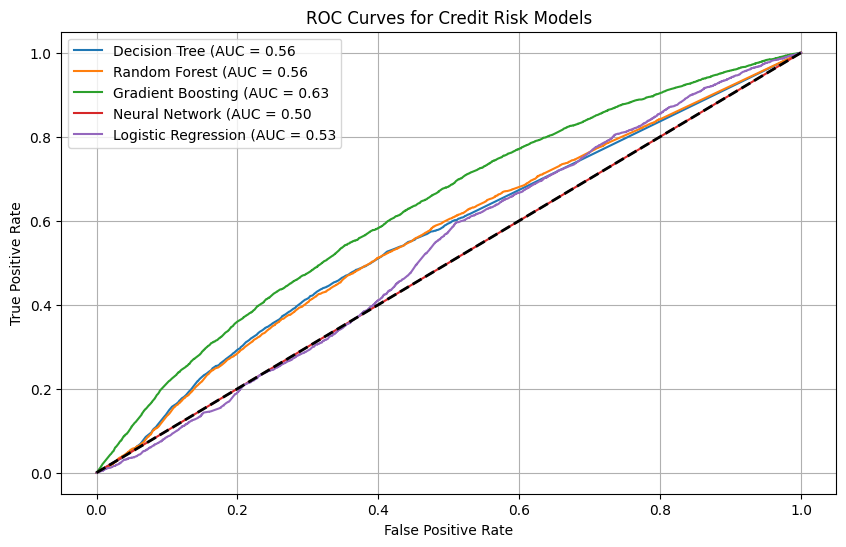

Decision Tree ROC AUC: 0.56
Random Forest ROC AUC: 0.56
Gradient Boosting ROC AUC: 0.63
Neural Network ROC AUC: 0.50
Logistic Regression ROC AUC: 0.53
Decision Tree Recall: 0.03
Random Forest Recall: 0.01
Gradient Boosting Recall: 0.00
Neural Network Recall: 0.00
Logistic Regression Recall: 0.00


In [51]:
target = 'TARGET'
features = ['NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'OWN_CAR_AGE',
            'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'NONLIVINGAREA_MEDI', 'WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(application_train[features], application_train[target], test_size=0.2, random_state=42)

# Create and train the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000),
    'Logistic Regression': LogisticRegression()
}

# Create a dictionary to store ROC AUC scores for each model
roc_auc_scores = {}

# Plot ROC curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')
    
    roc_auc_scores[name] = roc_auc

# Plot ROC curve for random chance
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Credit Risk Models')
plt.legend()
plt.grid(True)
plt.show()

# Display ROC AUC scores
for name, score in roc_auc_scores.items():
    print(f'{name} ROC AUC: {score:.2f}')

# Create a dictionary to store recall scores for each model
recall_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    
    recall_scores[name] = recall

# Display recall scores
for name, score in recall_scores.items():
    print(f'{name} Recall: {score:.2f}')


**Gradient Boosting ROC AUC: 0.63** is the best performing model out of 5 machine learning models.

Interpretation of the low recall values for each model:

Decision Tree Recall: 0.03: Only 3% of the customers who are likely to default are correctly identified by the Decision Tree model. This model has a high rate of false negatives, which means it's not good at capturing potential defaults.

Random Forest Recall: 0.01: Only 1% of the customers who are likely to default are correctly identified by the Random Forest model. It performs even worse in terms of recall compared to the Decision Tree.

Gradient Boosting Recall: 0.00: The Gradient Boosting model doesn't correctly identify any of the customers who are likely to default. This is a severe issue because it's failing to capture any of the potential default cases.

Neural Network Recall: 0.00: Similar to Gradient Boosting, the Neural Network model is also not capturing any potential defaults. It's failing to correctly identify any customers with a high likelihood of defaulting.

Logistic Regression Recall: 0.00: Logistic Regression also fails to correctly identify any potential defaults, making it ineffective in a credit risk assessment scenario.

**Precision-Recall Curve**

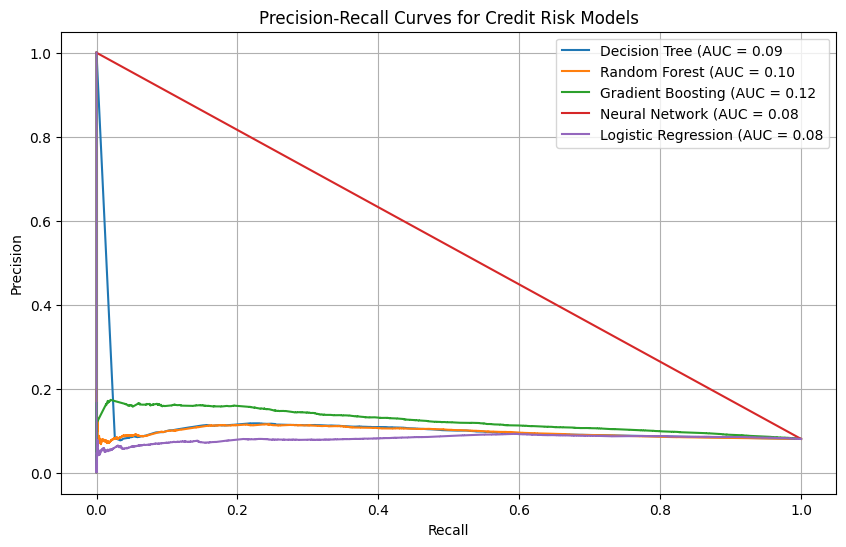

Decision Tree Precision-Recall AUC: 0.09
Random Forest Precision-Recall AUC: 0.10
Gradient Boosting Precision-Recall AUC: 0.12
Neural Network Precision-Recall AUC: 0.08
Logistic Regression Precision-Recall AUC: 0.08


In [54]:
# Create a dictionary to store precision-recall AUC scores for each model
precision_recall_auc_scores = {}

# Plot precision-recall curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_pred)
    
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f}')
    
    precision_recall_auc_scores[name] = pr_auc

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Credit Risk Models')
plt.legend()
plt.grid(True)
plt.show()

# Display Precision-Recall AUC scores
for name, score in precision_recall_auc_scores.items():
    print(f'{name} Precision-Recall AUC: {score:.2f}')

The Decision Tree model achieves a moderate trade-off between precision and recall.
Random Forest Precision-Recall AUC: 0.10 is slightly better than the Decision Tree.
The Gradient Boosting model has the highest Precision-Recall AUC at 0.12. This model provides a better balance between precision and recall, making it better at correctly classifying positive cases while keeping false positives relatively low.

Undersampling or oversampling techniques can improve the performance of the models.

**Confusion Matrix**



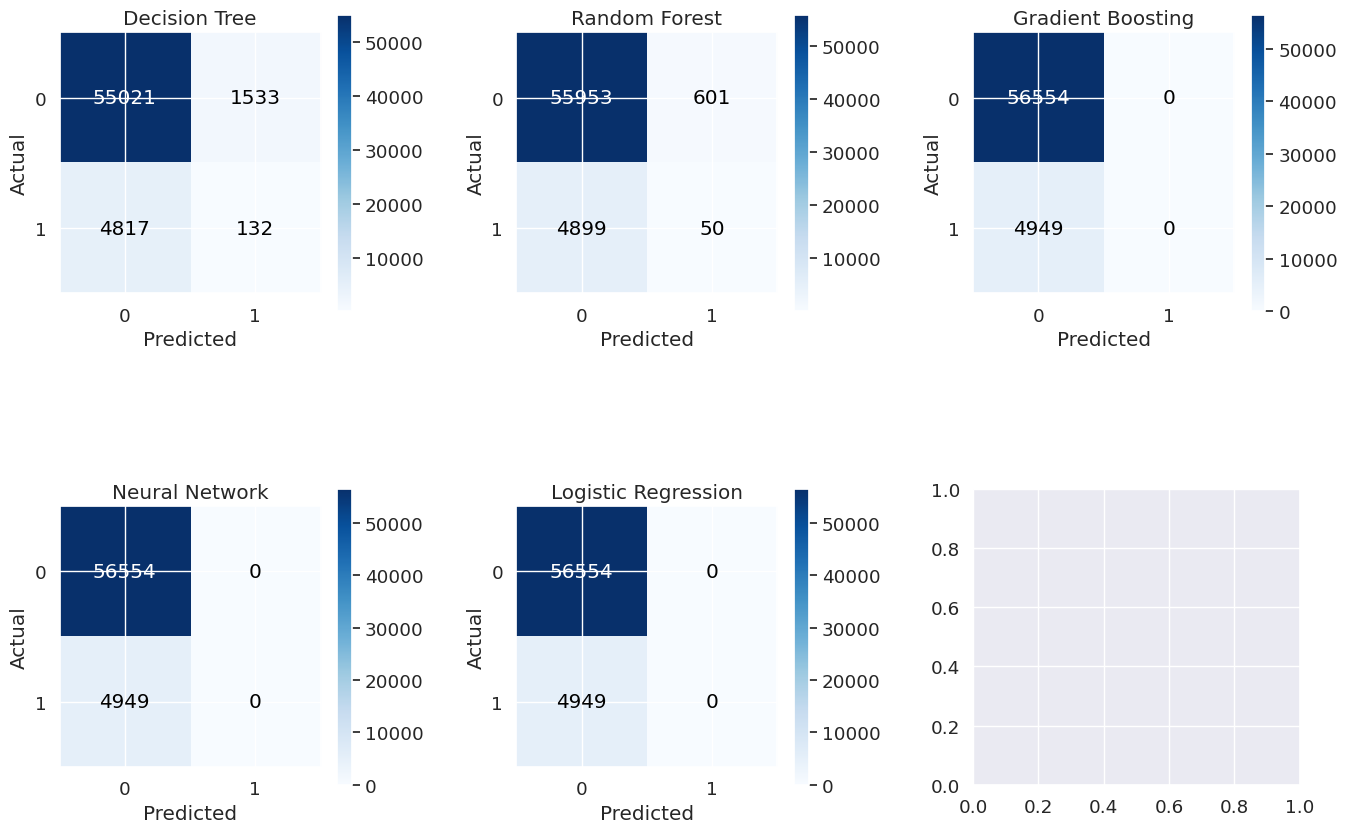

In [57]:
# Create a dictionary to store confusion matrices for each model
confusion_matrices = {}

# Set the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Loop through each model
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    # Plot the confusion matrix in the corresponding subplot
    ax = axes[i // num_cols, i % num_cols]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=[0, 1], yticks=[0, 1], xlabel='Predicted', ylabel='Actual', title=name)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

# Display the confusion matrices
plt.show()

**Ensemble Models for better predictability**

In [73]:
import numpy as np

# Assuming 'X_train' and 'X_test' are your data arrays

# Check the dimensions of X_train
print(f'Dimensions of X_train: {X_train.shape}')

# Check the dimensions of X_test
print(f'Dimensions of X_test: {X_test.shape}')


Dimensions of X_train: (246008, 9)
Dimensions of X_test: (1, 553527)


In [85]:
import shap
import xgboost
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have already defined X_train, X_test, y_train, y_test, and a features list.

# Create and train the XGBoost model
xgb_model = xgboost.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Initialize a TreeExplainer for the XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Print the target and predicted values for a specific prediction
target_index = 2  # Index of the prediction you want to explain

# Calculate the default value based on your dataset
default_value = explainer.expected_value

# Calculate the predicted value
predicted_value = xgb_model.predict(X_test)[target_index]

# Display the target and predicted values for reference
print('Target Value (actual):', y_test.iloc[target_index])  # Assuming y_test is a DataFrame or Series
print('Predicted Value (predicted):', predicted_value)

# Visualize the explanation for the prediction with feature names
shap.initjs()
shap.force_plot(default_value, shap_values[target_index], X_test[target_index], feature_names=features)


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[10:57:52] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Target Value (actual): 0
Predicted Value (predicted): 0


In [23]:
# Get the Random Forest and Gradient Boosting models
random_forest = models['Random Forest']
gradient_boosting = models['Gradient Boosting']

# Fit both models on the training data
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Get probabilities from both models
y_pred_rf = random_forest.predict_proba(X_test)[:, 1]
y_pred_gb = gradient_boosting.predict_proba(X_test)[:, 1]

# Average the probabilities
ensemble_probabilities = (y_pred_rf + y_pred_gb) / 2

# Calculate the ROC AUC score for the ensemble model
ensemble_roc_auc = roc_auc_score(y_test, ensemble_probabilities)

print(f'Ensemble Model ROC AUC: {ensemble_roc_auc:.2f}')


Ensemble Model ROC AUC: 0.60


**As the ROC AUC seen no improvement, the meta machine-learning model added no value.**

**Deep Learning Model**

In [24]:
X = application_train[features].values
y = application_train[target].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Get predicted probabilities for the test set
y_pred = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Deep Learning Model ROC AUC: {roc_auc:.2f}')

2023-10-13 07:45:30.636838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
3076/3076 [==============================] - 12s 2ms/step - loss: 0.2805 - accuracy: 0.9186 - val_loss: 0.2758 - val_accuracy: 0.9193
Epoch 2/10
3076/3076 [==============================] - 7s 2ms/step - loss: 0.2761 - accuracy: 0.9192 - val_loss: 0.2746 - val_accuracy: 0.9193
Epoch 3/10
3076/3076 [==============================] - 7s 2ms/step - loss: 0.2755 - accuracy: 0.9192 - val_loss: 0.2748 - val_accuracy: 0.9193
Epoch 4/10
3076/3076 [==============================] - 9s 3ms/step - loss: 0.2753 - accuracy: 0.9192 - val_loss: 0.2740 - val_accuracy: 0.9193
Epoch 5/10
3076/3076 [==============================] - 7s 2ms/step - loss: 0.2749 - accuracy: 0.9192 - val_loss: 0.2741 - val_accuracy: 0.9193
Epoch 6/10
3076/3076 [==============================] - 7s 2ms/step - loss: 0.2747 - accuracy: 0.9192 - val_loss: 0.2741 - val_accuracy: 0.9193
Epoch 7/10
3076/3076 [==============================] - 7s 2ms/step - loss: 0.2745 - accuracy: 0.9192 - val_loss: 0.2747 - val_accuracy

**Even deep learning model is giving only 0.62 ROC AUC** 

In [25]:
threshold = 0.5  
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

print(f'Deep Learning Model Recall: {recall:.2f}')

Deep Learning Model Recall: 0.00


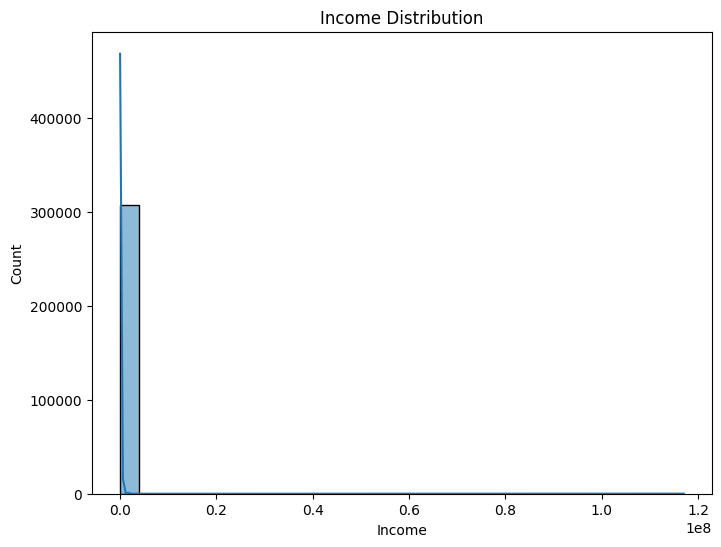

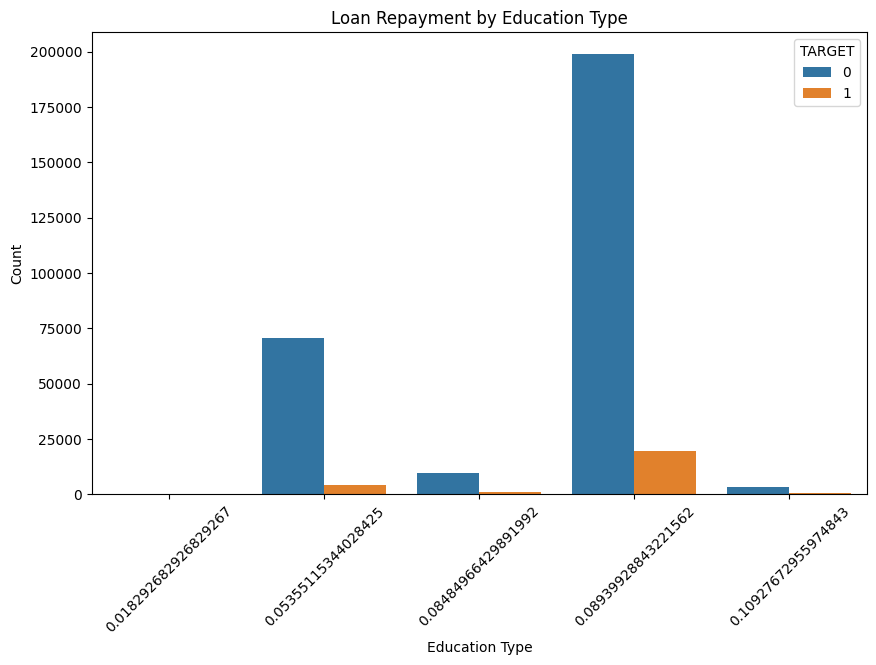

/home/mohan/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


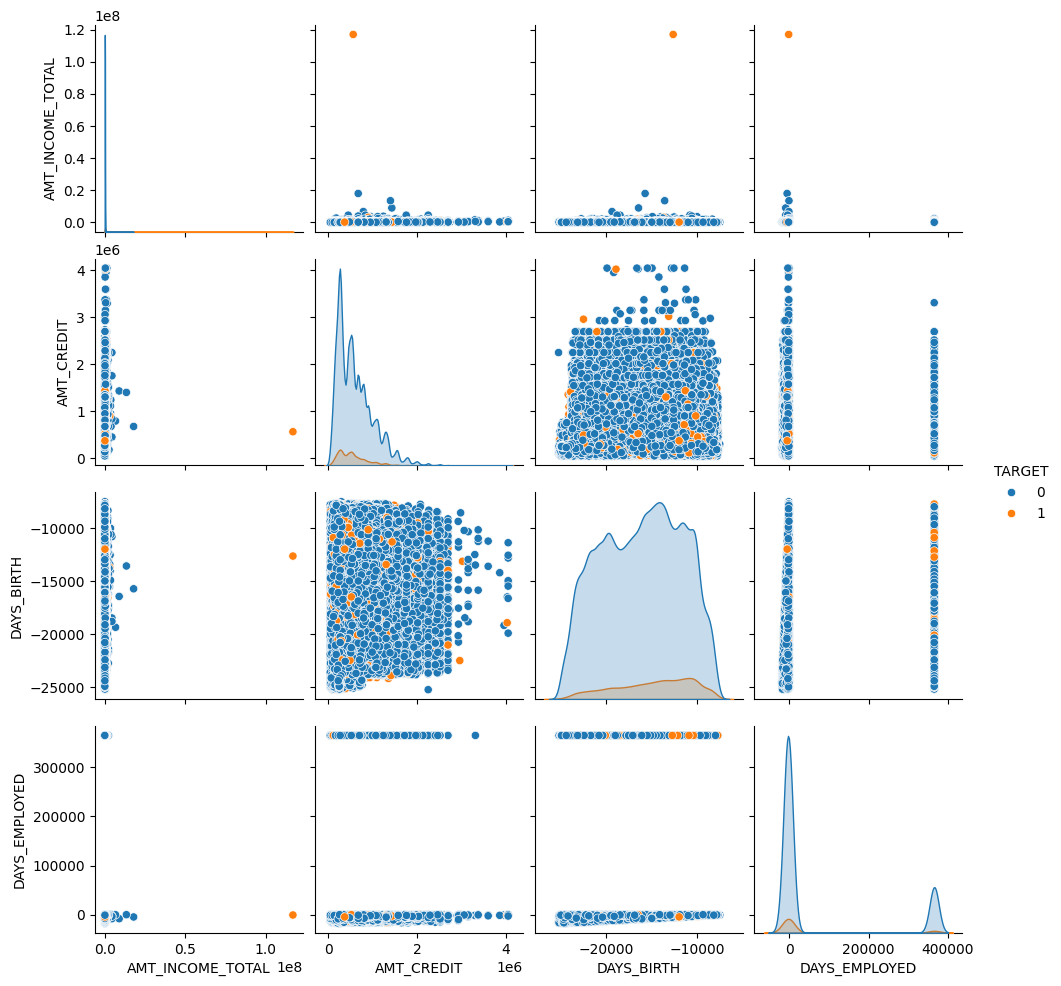

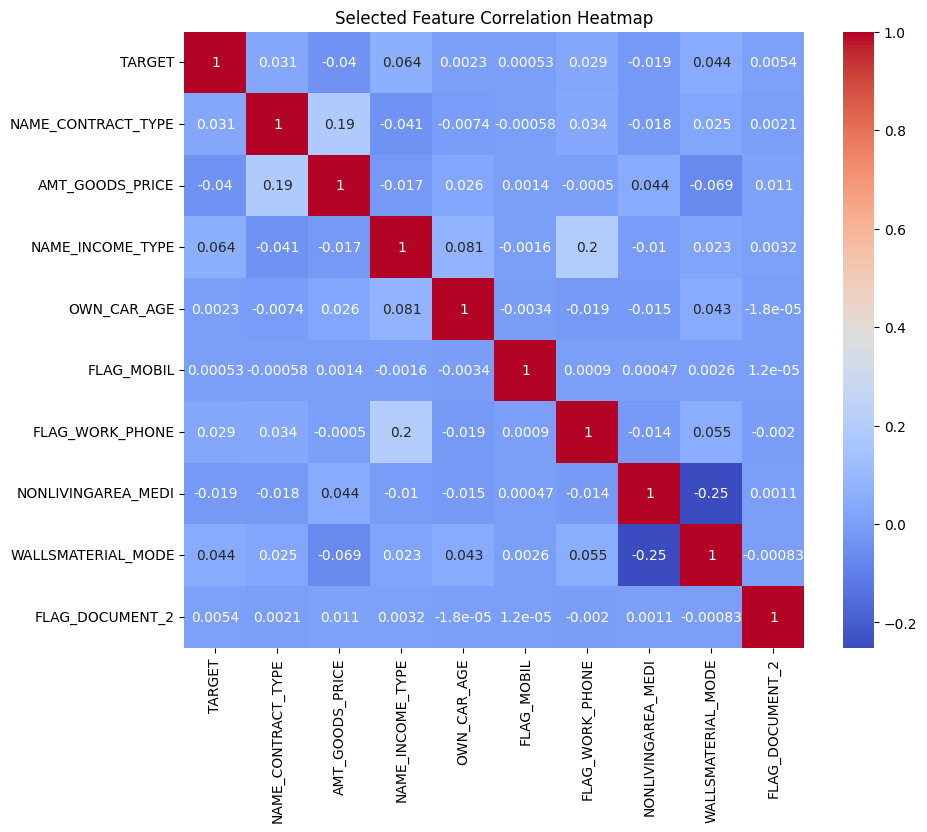

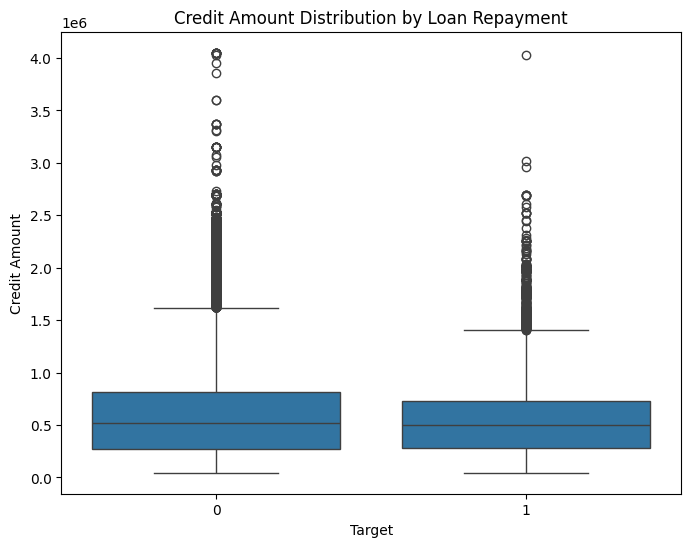

In [26]:
#  1: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(application_train['AMT_INCOME_TOTAL'], bins=30, kde=True)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

#  2: Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=application_train, x='NAME_EDUCATION_TYPE', hue='TARGET')
plt.xticks(rotation=45)
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.title('Loan Repayment by Education Type')
plt.show()

#  3: Pair Plot
sns.pairplot(data=application_train, vars=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], hue='TARGET')
plt.show()

# 4 : Calculate the correlation matrix for selected features
selected_features = application_train[['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'NONLIVINGAREA_MEDI', 'WALLSMATERIAL_MODE', 'FLAG_DOCUMENT_2']]
correlation_matrix = selected_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Selected Feature Correlation Heatmap')
plt.show()


#  5: Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=application_train, x='TARGET', y='AMT_CREDIT')
plt.xlabel('Target')
plt.ylabel('Credit Amount')
plt.title('Credit Amount Distribution by Loan Repayment')
plt.show()